<a href="https://colab.research.google.com/github/amir-masoud/RL/blob/main/XOR_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
 [-1.17631387]
 [ 0.55774882]]
Wxh is :  [[0.905197   0.2381865  0.82002017 0.11985156 0.77054523]
 [0.36104188 0.21782295 0.26086654 0.38392677 0.49629873]]
Why is :  [[-0.06731509]
 [-0.16945451]
 [ 0.70366758]
 [-1.17631868]
 [ 0.5577578 ]]
Wxh is :  [[0.90519561 0.23818914 0.82002465 0.11986224 0.77056417]
 [0.36103558 0.21782041 0.26091984 0.38391439 0.49634603]]
Why is :  [[-0.06731451]
 [-0.16946294]
 [ 0.70365852]
 [-1.17632349]
 [ 0.55776678]]
Wxh is :  [[0.90519423 0.23819179 0.82002914 0.11987291 0.77058311]
 [0.36102928 0.21781787 0.26097314 0.383902   0.49639334]]
Why is :  [[-0.06731394]
 [-0.16947137]
 [ 0.70364946]
 [-1.17632831]
 [ 0.55777576]]
Wxh is :  [[0.90519284 0.23819443 0.82003363 0.11988359 0.77060205]
 [0.36102298 0.21781534 0.26102645 0.38388962 0.49644065]]
Why is :  [[-0.06731337]
 [-0.1694798 ]
 [ 0.7036404 ]
 [-1.17633312]
 [ 0.55778475]]
Wxh is :  [[0.90519145 0.23819708 0.82003813 0.11989427 0.770621  

Text(0, 0.5, 'Cost')

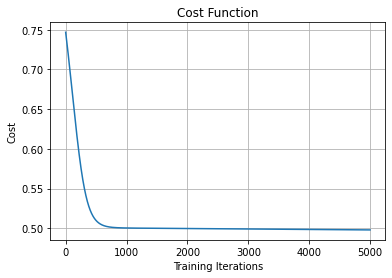

In [16]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy


import numpy as np
import matplotlib.pyplot as plt


x = np.array([[0,1], [1,0], [0,0], [1,1]])
y = np.array([[1], [1], [0], [0]])

num_inputs = 2
num_hiddens = 5
num_output = 1

# initalizing input to hidden weights and bias randomly
Wxh = np.random.rand(num_inputs, num_hiddens)
bh = np.zeros((1,num_hiddens))

# initalizing hidden to output weights and bias randomly
Why = np.random.randn (num_hiddens,num_output)
by = np.zeros((1,num_output))

def sigmoid(z):
  return  1 / (1+np.exp(-z))

def sigmoid_derivative(z):
  return np.exp(-z)/((1+np.exp(-z))**2)

def forward_prop(x,Wxh,Why):
  z1 = np.dot(x,Wxh) + bh
  a1 = sigmoid(z1)
  z2 = np.dot(a1,Why) + by
  y_hat = sigmoid(z2)
  return z1,a1,z2,y_hat

def backword_prop(y_hat, z1, a1, z2):
  delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
  dJ_dWhy = np.dot(a1.T, delta2)
  delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
  dJ_dWxh = np.dot(x.T, delta1)
  return dJ_dWxh, dJ_dWhy

def cost_function(y, y_hat):
  J = 0.5*sum((y-y_hat)**2)
  return J

alpha = 0.01
num_iterations = 5000

cost =[]
for i in range(num_iterations):
  if num_iterations%100==0 :
    print("Wxh is : ", Wxh)
    print("Why is : ", Why)
  z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
  dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
  #update weights
  Wxh = Wxh -alpha * dJ_dWxh
  Why = Why -alpha * dJ_dWhy
  #compute cost
  c = cost_function(y, y_hat)
  cost.append(c)


plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')